In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [10]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [12]:
X = pd.concat([X, geography, gender], axis=1)

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
X.shape

(10000, 11)

In [17]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [18]:
y.shape

(10000,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [21]:
X_test = sc.transform(X_test)

In [30]:
X_train.shape

(8000, 11)

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [24]:
#ANN

In [25]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [27]:
classifier = Sequential()

classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=11))
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [28]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [29]:
X_train.shape

(8000, 11)

In [31]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=100, epochs=100)

Epoch 1/100
54/54 [==============================] - 2s 12ms/step - loss: 0.7115 - accuracy: 0.6254 - val_loss: 0.6092 - val_accuracy: 0.7293
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7428 - val_loss: 0.5507 - val_accuracy: 0.7698
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7704 - val_loss: 0.5164 - val_accuracy: 0.7910
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7988 - val_loss: 0.4940 - val_accuracy: 0.7989
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7995 - val_loss: 0.4790 - val_accuracy: 0.8027
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.7975 - val_loss: 0.4683 - val_accuracy: 0.8065
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8128 - val_loss: 0.4604 - val_accuracy: 0.8084
Epoch 8/100


In [32]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

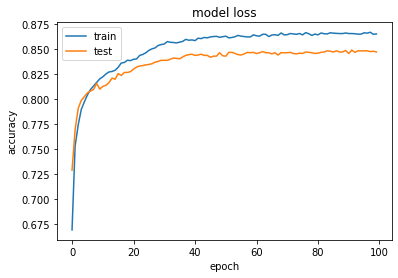

In [33]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

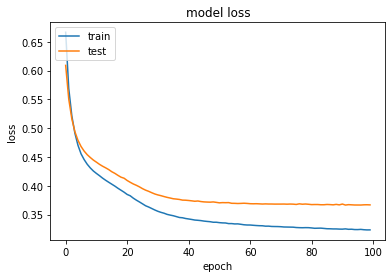

In [34]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [36]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [38]:
cm

array([[1517,   78],
       [ 199,  206]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [40]:
score

0.8615